 "Global Terrorism Database 1970-2017" and "World GDP&GNH Index" into PostresSQL server

In [1]:
import csv
import pprint

data_GDP_GNH = list(csv.DictReader(open('GDP&GNH.csv')))
data_Terrorism = list(csv.DictReader(open('Terrorism.csv')))

Connecte to PSQL

In [1]:
import psycopg2

def pgconnect():
    YOUR_UNIKEY = 'kahu5036'
    YOUR_PW     = '490597347'
    try: 
        conn = psycopg2.connect(host='soit-db-pro-2.ucc.usyd.edu.au',
                                database='y19s2c5310_'+YOUR_UNIKEY,
                                user='y19s2c5310_'+YOUR_UNIKEY, 
                                password=YOUR_PW)
        print('connected')
    except Exception as e:
        print("unable to connect to the database")
        print(e)
    return conn

SQL statements against the database

In [2]:
def pgexec( conn, sqlcmd, args, msg, silent=False ):
   """ utility function to execute some SQL statement
       can take optional arguments to fill in (dictionary)
       error and transaction handling built-in """
   retval = False
   with conn:
      with conn.cursor() as cur:
         try:
            if args is None:
               cur.execute(sqlcmd)
            else:
               cur.execute(sqlcmd, args)
            if silent == False: 
                print("success: " + msg)
            retval = True
         except Exception as e:
            if silent == False: 
                print("db error: ")
                print(e)
   return retval

Create Database

In [252]:
conn = pgconnect()

pgexec (conn, "DROP TABLE IF EXISTS GDP_GNH", None, "Reset Table GDP_GNH")
pgexec (conn, "DROP TABLE IF EXISTS Terrorism", None, "Reset Table Terrorism")

GDP_GNH_schema = """CREATE TABLE IF NOT EXISTS GDP_GNH (
                         Year VARCHAR,
                         Country VARCHAR(50),
                         Region VARCHAR(100),
                         Happiness_Rank VARCHAR(20),
                         Happiness_Score VARCHAR(20),
                         GDP VARCHAR(20),
                         Health VARCHAR(20),
                         Freedom VARCHAR(20),
                         Government_Corruption VARCHAR(20)
                   )"""

Terrorism_schema = """CREATE TABLE IF NOT EXISTS Terrorism (
                         Year VARCHAR,
                         Country VARCHAR(50),
                         Region VARCHAR(100),
                         Attack_type VARCHAR(100),
                         Targrt_type VARCHAR(100)
                   )"""

pgexec (conn, GDP_GNH_schema, None, "Create Table GDP_GNH")
pgexec (conn, Terrorism_schema, None, "Create Table Terrorism")


connected
success: Reset Table GDP_GNH
success: Reset Table Terrorism
success: Create Table GDP_GNH
success: Create Table Terrorism


True

In [253]:
GDP_GNH_stmt = """INSERT INTO GDP_GNH(Year,Country,Region,Happiness_Rank,Happiness_Score,GDP,Health,Freedom,Government_Corruption) VALUES (%(Year)s, %(Country)s, %(Region)s, %(Happiness_Rank)s, %(Happiness_Score)s,%(GDP)s, %(Life_Expectancy)s, %(Freedom)s, %(Government_Corruption)s)"""
Terrorism_stmt = """INSERT INTO Terrorism(Year,Country,Region,Attack_type,Targrt_type) VALUES (%(Year)s, %(country_txt)s, %(region_txt)s, %(attacktype1_txt)s, %(targtype1_txt)s)"""

for row in data_GDP_GNH:
    pgexec (conn, GDP_GNH_stmt, row, "row inserted")
for row in data_Terrorism:
    pgexec (conn, Terrorism_stmt, row, "row inserted")

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2.extras
import seaborn as sns

def pgquery( conn, sqlcmd, args, silent=False, returntype='tuple'):
   """ utility function to execute some SQL query statement
       it can take optional arguments (as a dictionary) to fill in for placeholder in the SQL
       will return the complete query result as return value - or in case of error: None
       error and transaction handling built-in (by using the 'with' clauses) """
   retval = None
   with conn:
      cursortype = None if returntype != 'dict' else psycopg2.extras.RealDictCursor     
      with conn.cursor(cursor_factory=cursortype) as cur:
         try:
            if args is None:
                cur.execute(sqlcmd)
            else:
                cur.execute(sqlcmd, args)
            retval = cur.fetchall() # we use fetchall() as we expect only _small_ query results
         except Exception as e:
            if e.pgcode != None and not(silent):
                print("db read error: ")
                print(e)
   return retval

def make_plot_bar(data, x_key, y_key, title, xlabel=None, ylabel=None, bar_width=0.5, categorical=True):
    xlabel = xlabel or x_key
    ylabel = ylabel or y_key
    
    data = query_result
    df = pd.DataFrame(data)
    fig = plt.figure(figsize=(20,10))
    plt.bar(df[xlabel],df[ylabel])
    plt.title(title)
    plt.xticks(rotation='vertical')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
def make_plot_linechar(data, x_key, y_key, title, xlabel=None, ylabel=None):
    xlabel = xlabel or x_key
    ylabel = ylabel or y_key
    xs = [row[x_key] for row in data]
    ys = [row[y_key] for row in data]
    fig = plt.figure(figsize=(20,10))
    plt.title(title)
    plt.xticks(rotation='vertical')
    plt.plot(xs, ys, 'g-', label='Numbers')

connected
[{'region': 'Middle East & North Africa', 'count': 50474}, {'region': 'Southeast Asia', 'count': 12485}, {'region': 'South America', 'count': 18978}, {'region': 'Sub-Saharan Africa', 'count': 17550}, {'region': 'East Asia', 'count': 802}, {'region': 'South Asia', 'count': 44974}, {'region': 'Central America & Caribbean', 'count': 10344}, {'region': 'Western Europe', 'count': 16639}, {'region': 'Central Asia', 'count': 563}, {'region': 'Australasia & Oceania', 'count': 282}, {'region': 'North America', 'count': 3456}, {'region': 'Eastern Europe', 'count': 5144}]
{'region': 'Middle East & North Africa', 'count': 50474}
{'region': 'Southeast Asia', 'count': 12485}
{'region': 'South America', 'count': 18978}
{'region': 'Sub-Saharan Africa', 'count': 17550}
{'region': 'East Asia', 'count': 802}
{'region': 'South Asia', 'count': 44974}
{'region': 'Central America & Caribbean', 'count': 10344}
{'region': 'Western Europe', 'count': 16639}
{'region': 'Central Asia', 'count': 563}
{'re

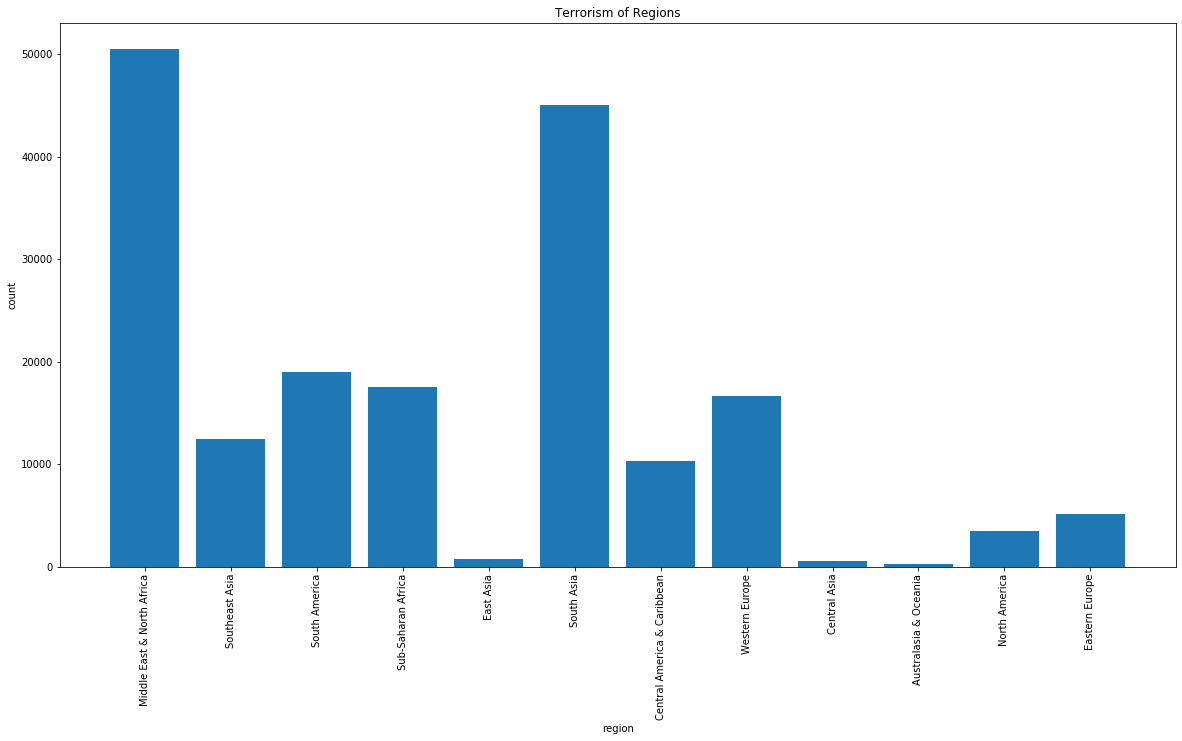

In [4]:
conn = pgconnect()
    
# prepare SQL statement
query_stmt ="""SELECT region, COUNT(*) FROM Terrorism GROUP BY region;"""
# execute query and print result
query_result = pgquery (conn, query_stmt, None, returntype='dict')
print(query_result)
for r in query_result:
    print(r)
# cleanup


make_plot_bar(
    query_result,
    x_key='region',
    y_key='count',
    title='Terrorism of Regions',
    categorical=True)




Make the changing of Terrorism numbers between 1970 and 2017

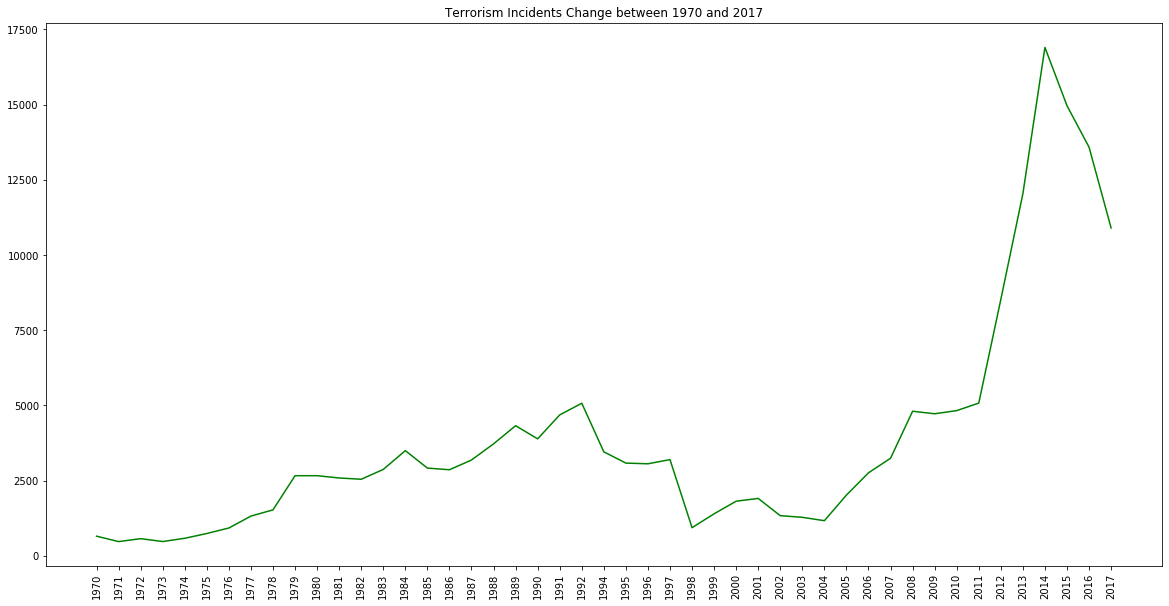

In [5]:
query_stmt ="""SELECT DISTINCT year, COUNT(*) FROM Terrorism GROUP BY year ORDER BY year;"""
query_result = pgquery (conn, query_stmt, None, returntype='dict')
    
make_plot_linechar(
    data=query_result,
    x_key='year',
    y_key='count',
    title='Terrorism Incidents Change between 1970 and 2017', 
    xlabel=None, 
    ylabel=None)


Use Pandans to transfer Directry to Pandas.Dataframes

Clean the target type by using below append function

In [6]:
query_stmt ="""SELECT * FROM Terrorism;"""
terror_temp = pgquery (conn, query_stmt, None, returntype='dict')
df = pd.DataFrame(terror_temp)
target = []
[target.append('Business') for attack in df.targrt_type.values if attack in ['Business', 'Journalists & Media', 'NGO']]
[target.append('Government') for attack in df.targrt_type.values if attack in ['Government (General)', 'Government (Diplomatic)', 'Police', 'Military']]
[target.append('Public') for attack in df.targrt_type.values if attack in ['Educational Institution', 'Religious Figures/Institutions', 'Airports & Aircraft', 'Maritime', 'Transportation']]
[target.append('Abortion') for attack in df.targrt_type.values if attack in ['Abortion Related']]
[target.append('Facility') for attack in df.targrt_type.values if attack in ['Food or Water Supply', 'Telecommunication', 'Utilities']]

result = pd.value_counts(target)

print(result)

Government    77346
Business      24587
Public        17255
Facility       7349
Abortion        263
dtype: int64


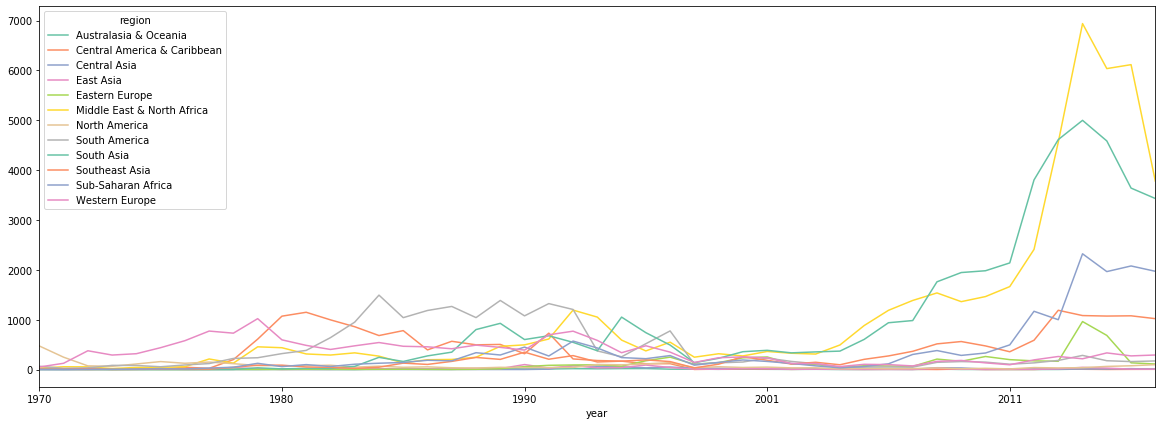

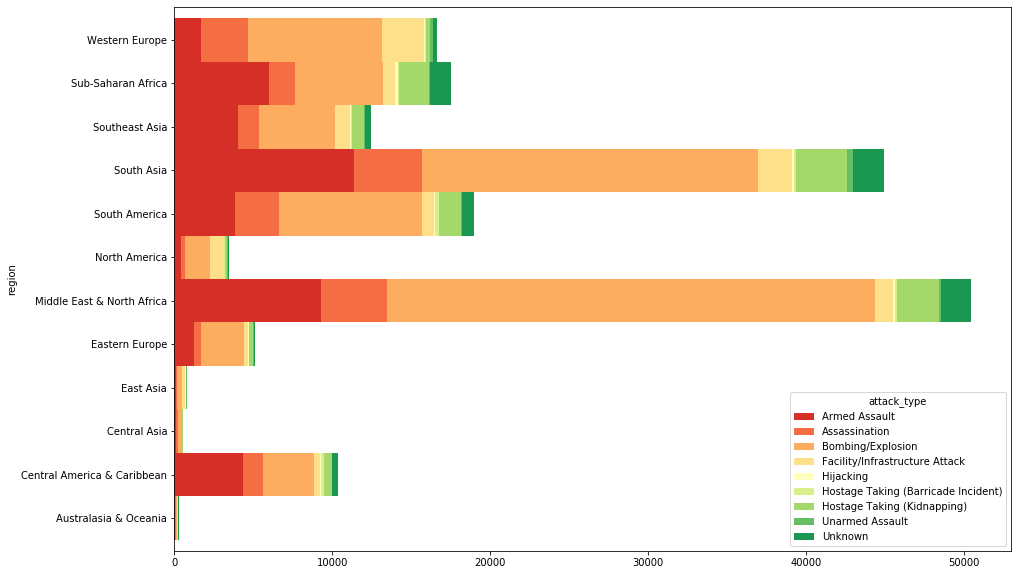

In [7]:
query_stmt ="""SELECT * FROM Terrorism;"""
terror_temp = pgquery (conn, query_stmt, None, returntype='dict')

df = pd.DataFrame(terror_temp)

terror_region = pd.crosstab(df.year, df.region, dropna=False)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

pd.crosstab(df.region,df.attack_type).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()



Next part is to process GDP_GNP configures

Datatype transfer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
country                  158 non-null object
freedom                  158 non-null float64
gdp                      158 non-null float64
government_corruption    158 non-null float64
happiness_rank           158 non-null float64
happiness_score          158 non-null float64
health                   158 non-null float64
region                   158 non-null object
dtypes: float64(6), object(2)
memory usage: 10.0+ KB


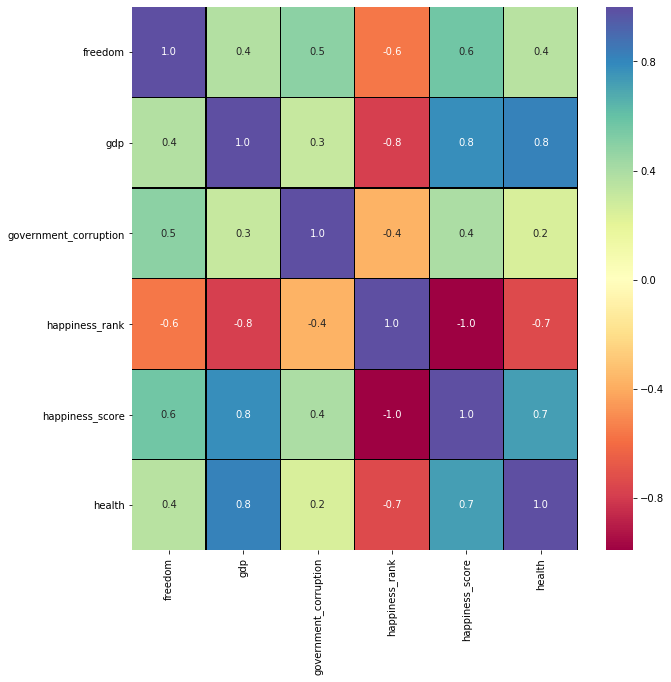

In [8]:
import seaborn

query_stmt_2015 ="""SELECT country,region,happiness_rank,happiness_score,gdp,health,freedom,government_corruption FROM gdp_gnh where year = '2015';"""
query_stmt_2016 ="""SELECT country,region,happiness_rank,happiness_score,gdp,health,freedom,government_corruption FROM gdp_gnh where year = '2016';"""
query_stmt_2017 ="""SELECT country,region,happiness_rank,happiness_score,gdp,health,freedom,government_corruption FROM gdp_gnh where year = '2017';"""
query_result = pgquery (conn, query_stmt_2015, None, returntype='dict')
df_2015 = pd.DataFrame(query_result)
query_result = pgquery (conn, query_stmt_2016, None, returntype='dict')
df_2016 = pd.DataFrame(query_result)
query_result = pgquery (conn, query_stmt_2017, None, returntype='dict')
df_2017 = pd.DataFrame(query_result)

df_2015['freedom'] = df_2015['freedom'].astype('float')
df_2015['gdp'] = df_2015['gdp'].astype('float')
df_2015['government_corruption'] = df_2015['government_corruption'].astype('float')
df_2015['happiness_rank'] = df_2015['happiness_rank'].astype('float')
df_2015['happiness_score'] = df_2015['happiness_score'].astype('float')
df_2015['health'] = df_2015['health'].astype('float')
df_2015.info()

df_2015.corr()
f,ax=plt.subplots(figsize=(10,10))
seaborn.heatmap(df_2015.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()
    

Below is assignment 2 Tasks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
country                  194 non-null object
freedom                  194 non-null float64
gdp                      194 non-null float64
government_corruption    194 non-null float64
happiness_rank           194 non-null float64
health                   194 non-null float64
terrorism_events         194 non-null float64
dtypes: float64(6), object(1)
memory usage: 10.7+ KB
---------------------------


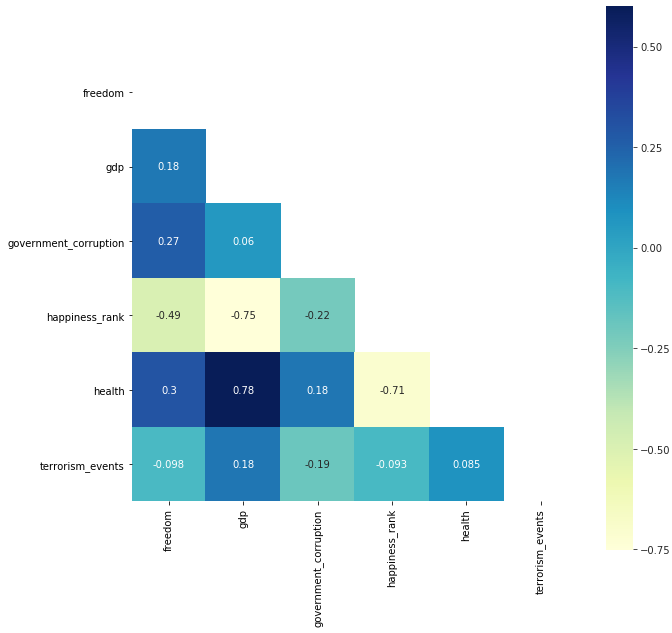

In [73]:
import seaborn

GDP_GNH_Terrorism ="""
Select country, Terrorism_events, happiness_rank, gdp, health, freedom, government_corruption from(
Select DISTINCT country country, count (country) as Terrorism_events, happiness_rank, gdp, health, freedom, government_corruption from
(
select H.country, H.happiness_rank, T.attack_type, T.targrt_type, h.gdp, h.health, h.freedom, h.government_corruption from gdp_gnh as H left join terrorism as T on H.country = T.country group by 1,2,3,4,5,6,7,8
) as T1
GROUP By country, 3, 4, 5, 6, 7 order by Terrorism_events desc
) as T2 where Terrorism_events > 40;"""


query_result = pgquery (conn, GDP_GNH_Terrorism, None, returntype='dict')
GDP_GNH_Terrorism = pd.DataFrame(query_result)

# GDP_GNH_Terrorism['country'] = GDP_GNH_Terrorism['country'].astype('float')
GDP_GNH_Terrorism['terrorism_events'] = GDP_GNH_Terrorism['terrorism_events'].astype('float')
GDP_GNH_Terrorism['happiness_rank'] = GDP_GNH_Terrorism['happiness_rank'].astype('float')
GDP_GNH_Terrorism['gdp'] = GDP_GNH_Terrorism['gdp'].astype('float')
GDP_GNH_Terrorism['health'] = GDP_GNH_Terrorism['health'].astype('float')
GDP_GNH_Terrorism['freedom'] = GDP_GNH_Terrorism['freedom'].astype('float')
GDP_GNH_Terrorism['government_corruption'] = GDP_GNH_Terrorism['government_corruption'].astype('float')
GDP_GNH_Terrorism.info()

GDP_GNH_Terrorism_1 = GDP_GNH_Terrorism
GDP_GNH_Terrorism_1.pop("country")

GDP_GNH_Terrorism_state = GDP_GNH_Terrorism_1.describe()
GDP_GNH_Terrorism_state = GDP_GNH_Terrorism_state.transpose()
print("---------------------------")

def norm(x):
    return (x - GDP_GNH_Terrorism_state['mean']) / GDP_GNH_Terrorism_state['std']

normed_GDP_GNH_Terrorism = norm(GDP_GNH_Terrorism)

corr = normed_GDP_GNH_Terrorism.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f,ax=plt.subplots(figsize=(10,10))
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask,annot=True, vmax=.6, square=True,ax=ax,linecolor="black",cmap="YlGnBu")

# GDP_GNH_Terrorism.corr()
# f,ax=plt.subplots(figsize=(10,10))
# seaborn.heatmap(GDP_GNH_Terrorism.corr(),annot=True,fmt="3.1f",linewidths=.2,cmap="YlGnBu",ax=ax,linecolor="black",center=0, square=True)
# plt.show()
    

Predict terrorism attacks using other indexes




In [37]:
GDP_GNH_Terrorism.head()



country   freedom       gdp  government_corruption  happiness_rank  \
0     India  0.397860  0.644990               0.084920           117.0   
1     India  0.402850  0.740360               0.087220           118.0   
2     India  0.469987  0.792221               0.092227           122.0   
3  Pakistan  0.235215  0.726884               0.124348            80.0   
4  Pakistan  0.121020  0.595430               0.104640            81.0   

     health  terrorism_events  
0  0.515290             140.0  
1  0.450910             140.0  
2  0.455428             140.0  
3  0.402048             136.0  
4  0.514660             136.0

In [38]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



In [39]:
dataset = GDP_GNH_Terrorism
country = dataset.pop("country")

country



0                         India
1                         India
2                         India
3                      Pakistan
4                      Pakistan
5                      Pakistan
6                      Colombia
7                      Colombia
8                      Colombia
9                   Afghanistan
10                  Afghanistan
11                  Afghanistan
12                         Iraq
13                         Iraq
14                         Iraq
15                  Philippines
16                  Philippines
17                  Philippines
18                United States
19                United States
20                United States
21                         Peru
22                         Peru
23                         Peru
24                        Yemen
25                        Yemen
26                        Yemen
27                       Turkey
28                       Turkey
29                       Turkey
                 ...           
164     

Pick top 10 countrys for model building


In [54]:
dataset['India'] = (country == "India")*1.0
dataset['Pakistan'] = (country == "Pakistan")*1.0
dataset['Colombia'] = (country == "Colombia")*1.0
dataset['Afghanistan'] = (country == "Afghanistan")*1.0
dataset['Iraq'] = (country == "Iraq")*1.0
dataset['Philippines'] = (country == "Philippines")*1.0
dataset['United States'] = (country == "United States")*1.0
dataset['Peru'] = (country == "Peru")*1.0
dataset['Yemen'] = (country == "Yemen")*1.0
dataset['Turkey'] = (country == "Turkey")*1.0

In [55]:
dataset.head()


freedom       gdp  government_corruption  happiness_rank    health  \
0  0.397860  0.644990               0.084920           117.0  0.515290   
1  0.402850  0.740360               0.087220           118.0  0.450910   
2  0.469987  0.792221               0.092227           122.0  0.455428   
3  0.235215  0.726884               0.124348            80.0  0.402048   
4  0.121020  0.595430               0.104640            81.0  0.514660   

   terrorism_events  India  Pakistan  Colombia  Afghanistan  Iraq  \
0             140.0    1.0       0.0       0.0          0.0   0.0   
1             140.0    1.0       0.0       0.0          0.0   0.0   
2             140.0    1.0       0.0       0.0          0.0   0.0   
3             136.0    0.0       1.0       0.0          0.0   0.0   
4             136.0    0.0       1.0       0.0          0.0   0.0   

   Philippines  United States  Peru  Yemen  Turkey  
0          0.0            0.0   0.0    0.0     0.0  
1          0.0            0.0   0.0    0.0     0.0  
2          0.0            0.0   0.0    0.0     0.0  
3          0.0            0.0   0.0    0.0     0.0  
4          0.0            0.0   0.0    0.0     0.0

In [56]:
dataset = dataset.astype('float64')
dataset.dtypes



freedom                  float64
gdp                      float64
government_corruption    float64
happiness_rank           float64
health                   float64
terrorism_events         float64
India                    float64
Pakistan                 float64
Colombia                 float64
Afghanistan              float64
Iraq                     float64
Philippines              float64
United States            float64
Peru                     float64
Yemen                    float64
Turkey                   float64
dtype: object

In [57]:
#Spilt the dataset into trainning set and test set

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)




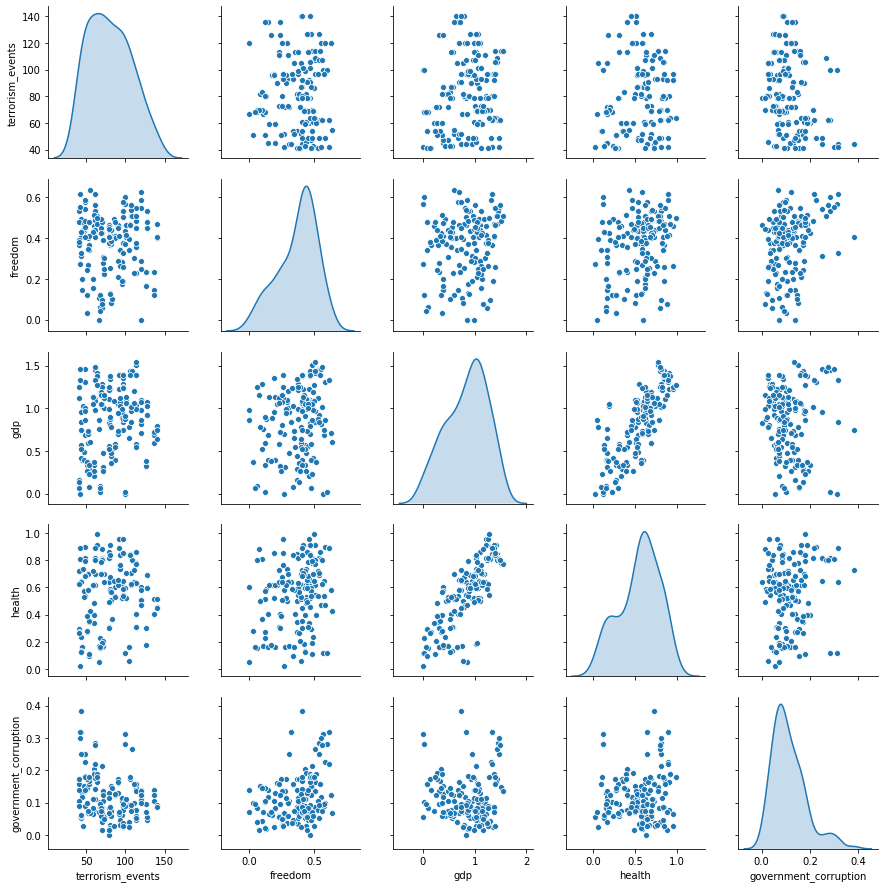

In [58]:
# check the data distribution before trainning
sns.pairplot(train_dataset[["terrorism_events", "freedom", "gdp", "health", "government_corruption"]], diag_kind="kde")



In [59]:
train_stats = train_dataset.describe()

train_stats.pop("terrorism_events")
train_stats = train_stats.transpose()



#Seperate to two lables
train_labels = train_dataset.pop('terrorism_events')
test_labels = test_dataset.pop('terrorism_events')




In [60]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)



Build the model

In [45]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer, metrics=['mae', 'mse'])
  return model


In [53]:
model = build_model()

Rounds = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=Rounds, validation_split = 0.2, verbose=0)



In [54]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()



loss       mae        mse    val_loss    val_mae     val_mse  epoch
995  78.910788  6.239058  78.910789  226.967392  11.471076  226.967392    995
996  78.082409  6.243393  78.082413  240.249207  12.103477  240.249207    996
997  78.966473  6.327343  78.966476  227.929840  11.500624  227.929840    997
998  80.336152  6.364223  80.336151  229.085999  11.395067  229.085999    998
999  75.718341  6.013855  75.718338  229.639877  11.663918  229.639877    999

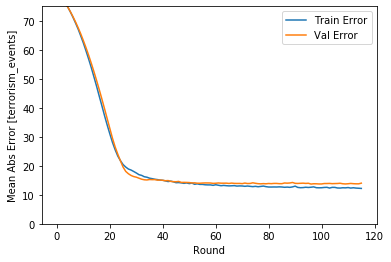

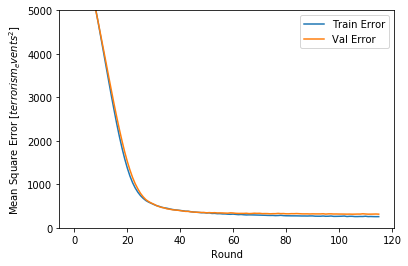

In [63]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Round')
  plt.ylabel('Mean Abs Error [terrorism_events]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,75])
  plt.legend()

  plt.figure()
  plt.xlabel('Round')
  plt.ylabel('Mean Square Error [$terrorism_events^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,5000])
  plt.legend()
  plt.show()


plot_history(history)



Fast Training Method

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               2048      
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 129       
Total params: 18,689
Trainable params: 18,689
Non-trainable params: 0
_________________________________________________________________


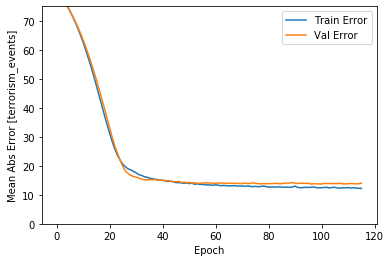

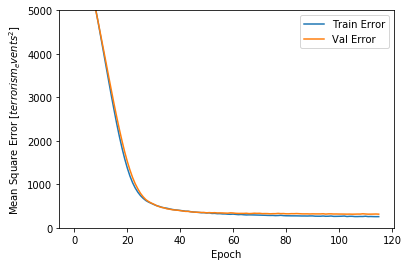

In [58]:
model = build_model()
model.summary()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

plot_history(history)


In [59]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} terrorism_events".format(mae))



39/39 - 0s - loss: 459.9442 - mae: 16.6570 - mse: 459.9442
Testing set Mean Abs Error: 16.66 terrorism_events


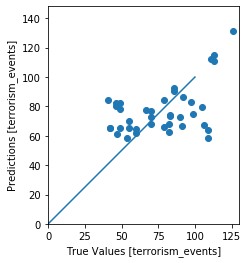

In [60]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [terrorism_events]')
plt.ylabel('Predictions [terrorism_events]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])e
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])




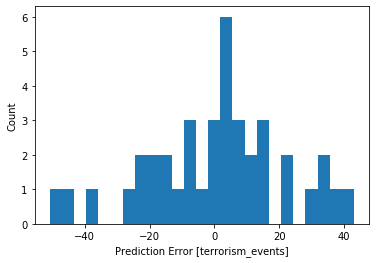

In [61]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [terrorism_events]")
_ = plt.ylabel("Count")

